## Check if output data looks reasonable

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

/sw/tools/python/anaconda3/2019.03/skl/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/sw/tools/python/anaconda3/2019.03/skl/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [5]:
# Output of simulation

# Idealized data
ds_ideal = xr.open_dataset('../../../../out/idealized_1712_1812/FIONA_idealized-3D_DOM01_ML_0001.nc')

# reference data
ds_ref = xr.open_dataset('../../../../out/reference_1712_1812/FIONA-3D_DOM01_ML_0001.nc')



In [9]:
ds_ref.coords

Coordinates:
  * time      (time) datetime64[ns] 2016-08-17T12:00:00 ... 2016-08-18
  * lon       (lon) float32 -46.0 -45.982 -45.964 ... -26.038 -26.02 -26.002
  * lat       (lat) float32 5.0 5.012 5.024 5.036 ... 18.464 18.476 18.488 18.5
  * height    (height) float64 1.0 2.0 3.0 4.0 5.0 ... 86.0 87.0 88.0 89.0 90.0
  * height_2  (height_2) float64 1.0 2.0 3.0 4.0 5.0 ... 88.0 89.0 90.0 91.0
  * height_3  (height_3) float64 1.0 2.0 3.0 4.0 5.0 ... 88.0 89.0 90.0 91.0

In [10]:
print(ds.clon.max()*180/np.pi)
print(ds.clon.min()*180/np.pi)
print(ds.clat.max()*180/np.pi)
print(ds.clat.min()*180/np.pi)



r_earth = 6371
km = 1.25
deg = 0.012

find_km = deg * np.pi/180 *r_earth
find_deg = km * 180 /(np.pi * r_earth) 
print(find_km, find_deg)

lon_nsteps = (ds.clon.min()*180/np.pi - ds.clon.max()*180/np.pi) / 0.018
lat_nsteps = (ds.clat.max()*180/np.pi - ds.clat.min()*180/np.pi) / 0.012

print(lon_nsteps, lat_nsteps)


AttributeError: 'Dataset' object has no attribute 'clon'

In [2]:
200*180/(np.pi*6371)

1.7986432118374611

In [10]:
u = ds.u.where(ds.u!=-9.99e-08, drop = True )

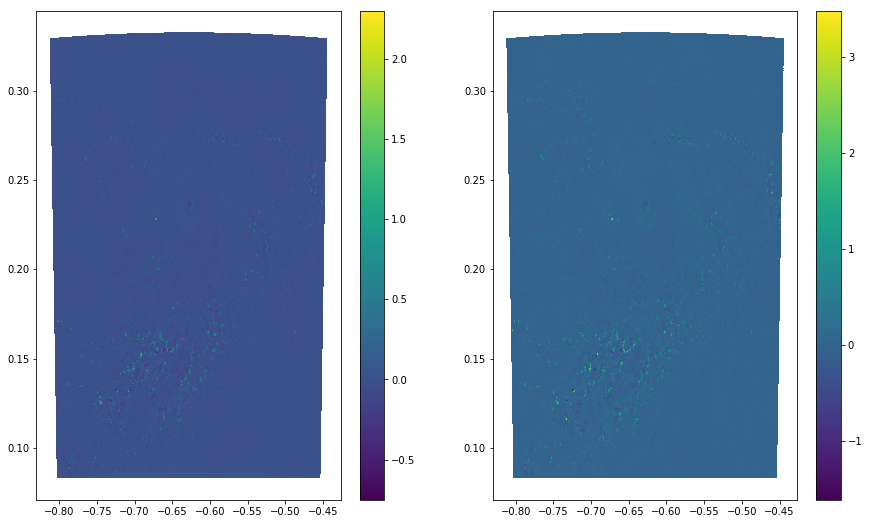

In [6]:
plt.figure(figsize=(15,9))
plt.subplot(121)
#u.isel(time=1, height=89).plot()
plt.tripcolor(ds.clon, ds.clat, ds.w.isel(time=0, height_2 = 73))
#plt.clim([-15,15])
plt.colorbar()

plt.subplot(122)
plt.tripcolor(ds_init.clon, ds_init.clat, ds_init.w.isel(time=0, height_2 = 60))
plt.colorbar()

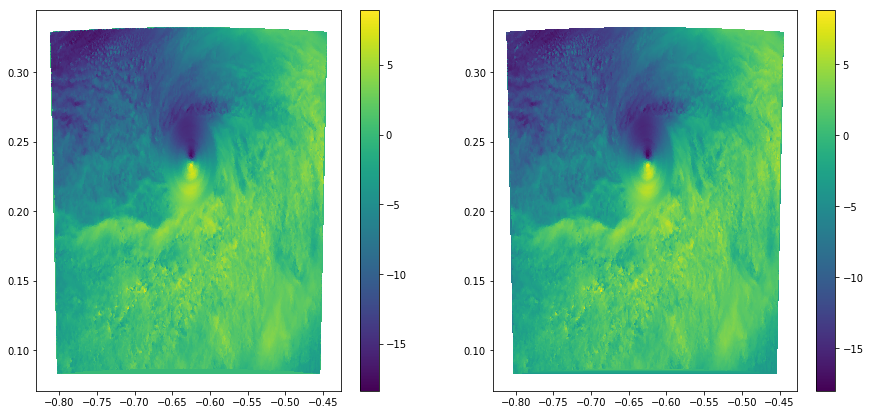

In [4]:
plt.figure(figsize=(15,7))
plt.subplot(121)
#u.isel(time=1, height=89).plot()
plt.tripcolor(ds.clon, ds.clat, ds.u.isel(time=0, height = 73))
#plt.clim([-15,15])
plt.colorbar()

plt.subplot(122)
plt.tripcolor(ds_init.clon, ds_init.clat, ds_init.u.isel(time=0, height = 60))
plt.colorbar()

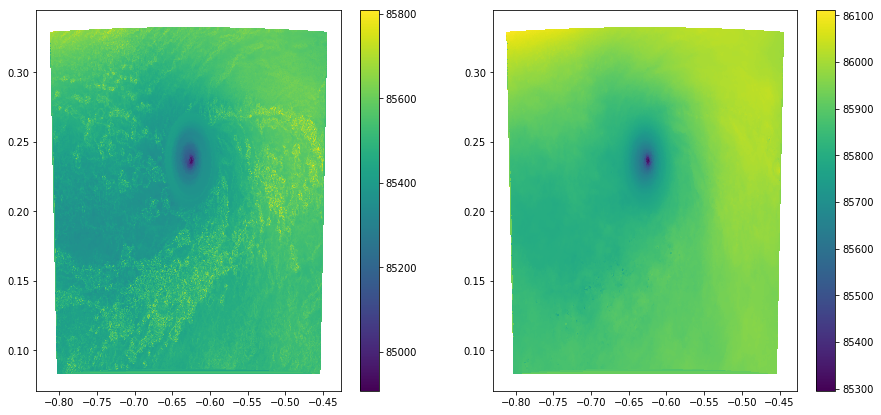

In [5]:
plt.figure(figsize=(15,7))
plt.subplot(121)
#u.isel(time=1, height=89).plot()
plt.tripcolor(ds.clon, ds.clat, ds.pres.isel(time=0, height = 73))
#plt.clim([-15,15])
plt.colorbar()

plt.subplot(122)
plt.tripcolor(ds_init.clon, ds_init.clat, ds_init.pres.isel(time=0, height = 60))
plt.colorbar()

In [78]:
ds

<xarray.Dataset>
Dimensions:        (bnds: 2, height: 90, height_2: 91, height_3: 91, ncells: 2469998, time: 2, vertices: 3)
Coordinates:
  * time           (time) datetime64[ns] 2016-08-17T12:00:00 2016-08-17T12:10:00
    clon           (ncells) float32 -0.80234563 -0.8023519 ... -0.44620237
    clat           (ncells) float32 0.08349012 0.08366188 ... 0.32778716
  * height         (height) float64 1.0 2.0 3.0 4.0 5.0 ... 87.0 88.0 89.0 90.0
  * height_2       (height_2) float64 1.0 2.0 3.0 4.0 ... 88.0 89.0 90.0 91.0
  * height_3       (height_3) float64 1.0 2.0 3.0 4.0 ... 88.0 89.0 90.0 91.0
Dimensions without coordinates: bnds, ncells, vertices
Data variables:
    clon_bnds      (ncells, vertices) float32 ...
    clat_bnds      (ncells, vertices) float32 ...
    height_bnds    (height, bnds) float64 ...
    height_3_bnds  (height_3, bnds) float64 ...
    u              (time, height, ncells) float32 ...
    v              (time, height, ncells) float32 ...
    w              (time, height_2, ncells) float32 ...
    rh             (time, height, ncells) float32 ...
    temp           (time, height, ncells) float32 ...
    clc            (time, height, ncells) float32 ...
    geopot         (time, height, ncells) float32 ...
    qv             (time, height, ncells) float32 ...
    qc             (time, height, ncells) float32 ...
    qr             (time, height, ncells) float32 ...
    qi             (time, height, ncells) float32 ...
    qs             (time, height, ncells) float32 ...
    rho            (time, height, ncells) float32 ...
    pv             (time, height, ncells) float32 ...
    z_ifc          (height_3, ncells) float32 ...
    theta_v        (time, height, ncells) float32 ...
Attributes:
    CDI:                  Climate Data Interface version 1.8.0rc7 (http://mpi...
    Conventions:          CF-1.6
    number_of_grid_used:  42
    uuidOfHGrid:          70554a06-ee52-11e8-85ba-61ba733eb070
    uuidOfVGrid:          9e236da2-70b7-518e-fb27-3f337d5d1f80
    title:                ICON simulation
    institution:          Max Planck Institute for Meteorology/Deutscher Wett...
    source:               git@git.mpimet.mpg.de:icon.git@f7aa6f434b2d155f6cd6...
    history:              /scratch/usr/bekthkis/ICON_08_2019/icon_gcc/build/x...
    references:           see MPIM/DWD publications
    comment:              bekthkis (bekthkis) on gcn1001 (Linux 3.10.0-1062.9...

In [63]:
# Create plot of level

plt.figure()
plt.tripcolor(ds.lon, ds.lat, ds.temp.isel( time=0, height=70), cmap='coolwarm')
plt.title('Temperature in 20m')
plt.xlabel('Longitude rad')  
plt.ylabel('Latitude rad')

ax = plt.subplot(111)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')

# Limiting coloring because some  0 values are in the data
plt.clim([295,301])
cbar = plt.colorbar() 
cbar.ax.set_ylabel('Temp in K')

AttributeError: 'Dataset' object has no attribute 'lon'

<Figure size 432x288 with 0 Axes>

<IPython.core.display.Javascript object>


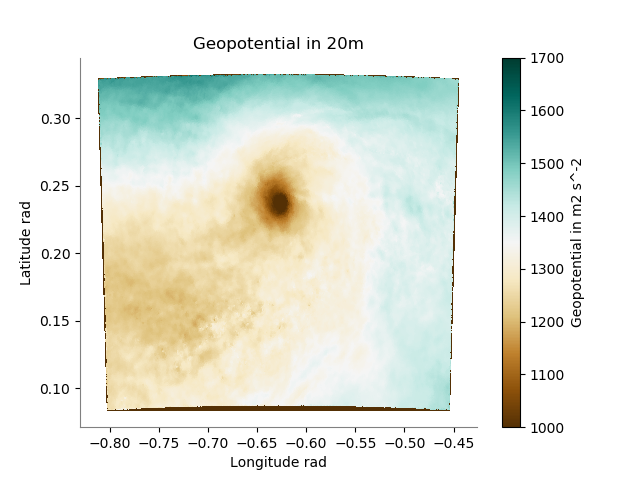

Text(0, 0.5, 'Geopotential in m2 s^-2')

In [36]:
# Create plot of level
plt.figure()
plt.tripcolor(ds.clon, ds.clat, ds.geopot.isel( time=1, plev=-1), cmap='BrBG')
plt.title('Geopotential in 20m')
plt.xlabel('Longitude rad')  
plt.ylabel('Latitude rad')

ax = plt.subplot(111)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')

# Limiting coloring because some  0 values are in the data
plt.clim([1000,1650])
cbar = plt.colorbar() 
cbar.ax.set_ylabel('Geopotential in m2 s^-2')

/sw/tools/python/anaconda3/2019.03/skl/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Text(0, 0.5, ' m s^-1')

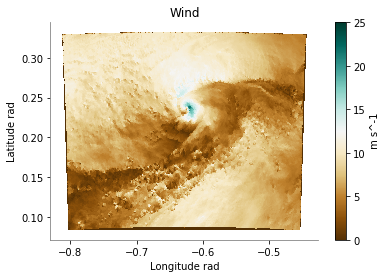

In [62]:
# Create plot of level
wind = np.sqrt(ds.u[1,-3]**2 + ds.v[1,-3]**2)

plt.tripcolor(ds.clon, ds.clat, wind, cmap='BrBG')
plt.title('Wind')
plt.xlabel('Longitude rad')  
plt.ylabel('Latitude rad')

ax = plt.subplot(111)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')

# Limiting coloring because some  0 values are in the data
plt.clim([0,25])
cbar = plt.colorbar() 
cbar.ax.set_ylabel(' m s^-1')

In [28]:

file_path = '../../../../out/Test_idealized_reg_grid/'
file_name = 'FIONA_idealized-3D_DOM01_ML_0001.nc'

ds = xr.open_dataset(file_path+file_name)
ds

<xarray.Dataset>
Dimensions:        (bnds: 2, height: 90, height_2: 91, height_3: 91, lat: 1189, lon: 1169, time: 2)
Coordinates:
  * time           (time) datetime64[ns] 2016-08-17T12:00:00 2016-08-17T12:30:00
  * lon            (lon) float32 -46.51 -46.492 -46.474 ... -25.504 -25.486
  * lat            (lat) float32 4.78 4.792 4.804 4.816 ... 19.012 19.024 19.036
  * height         (height) float64 1.0 2.0 3.0 4.0 5.0 ... 87.0 88.0 89.0 90.0
  * height_2       (height_2) float64 1.0 2.0 3.0 4.0 ... 88.0 89.0 90.0 91.0
  * height_3       (height_3) float64 1.0 2.0 3.0 4.0 ... 88.0 89.0 90.0 91.0
Dimensions without coordinates: bnds
Data variables:
    height_bnds    (height, bnds) float64 ...
    height_3_bnds  (height_3, bnds) float64 ...
    u              (time, height, lat, lon) float32 ...
    v              (time, height, lat, lon) float32 ...
    w              (time, height_2, lat, lon) float32 ...
    rh             (time, height, lat, lon) float32 ...
    temp           (time, height, lat, lon) float32 ...
    clc            (time, height, lat, lon) float32 ...
    geopot         (time, height, lat, lon) float32 ...
    qv             (time, height, lat, lon) float32 ...
    qc             (time, height, lat, lon) float32 ...
    qr             (time, height, lat, lon) float32 ...
    qi             (time, height, lat, lon) float32 ...
    qs             (time, height, lat, lon) float32 ...
    rho            (time, height, lat, lon) float32 ...
    pv             (time, height, lat, lon) float32 ...
    z_ifc          (height_3, lat, lon) float32 ...
    theta_v        (time, height, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.8.0rc7 (http://mpimet.mpg....
    Conventions:  CF-1.6
    uuidOfVGrid:  9e236da2-70b7-518e-fb27-3f337d5d1f80
    title:        ICON simulation
    institution:  Max Planck Institute for Meteorology/Deutscher Wetterdienst
    source:       git@git.mpimet.mpg.de:icon.git@f7aa6f434b2d155f6cd647d95d05...
    history:      /scratch/usr/bekthkis/ICON_08_2019/icon_gcc/build/x86_64-un...
    references:   see MPIM/DWD publications
    comment:      bekthkis (bekthkis) on gcn1378 (Linux 3.10.0-1062.9.1.el7.x...

In [33]:
temp = ds.temp.where(ds.temp > 200, drop = True)

<IPython.core.display.Javascript object>


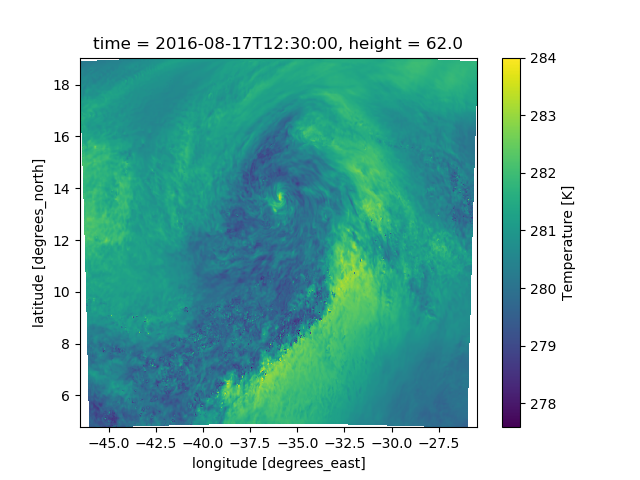

In [34]:
temp.isel(time=1, height=60).plot()

In [17]:
ds_out = xr.open_dataset('../../../../out/idealized_1712_1812/FIONA_idealized-3D_DOM01_ML_0001.nc')

In [18]:
ds_out

<xarray.Dataset>
Dimensions:        (bnds: 2, height: 90, height_2: 91, height_3: 91, lat: 1189, lon: 1169, time: 25)
Coordinates:
  * time           (time) datetime64[ns] 2016-08-17T12:00:00 ... 2016-08-18
  * lon            (lon) float32 -46.51 -46.492 -46.474 ... -25.504 -25.486
  * lat            (lat) float32 4.78 4.792 4.804 4.816 ... 19.012 19.024 19.036
  * height         (height) float64 1.0 2.0 3.0 4.0 5.0 ... 87.0 88.0 89.0 90.0
  * height_2       (height_2) float64 1.0 2.0 3.0 4.0 ... 88.0 89.0 90.0 91.0
  * height_3       (height_3) float64 1.0 2.0 3.0 4.0 ... 88.0 89.0 90.0 91.0
Dimensions without coordinates: bnds
Data variables:
    height_bnds    (height, bnds) float64 ...
    height_3_bnds  (height_3, bnds) float64 ...
    u              (time, height, lat, lon) float32 ...
    v              (time, height, lat, lon) float32 ...
    w              (time, height_2, lat, lon) float32 ...
    rh             (time, height, lat, lon) float32 ...
    temp           (time, height, lat, lon) float32 ...
    clc            (time, height, lat, lon) float32 ...
    geopot         (time, height, lat, lon) float32 ...
    qv             (time, height, lat, lon) float32 ...
    qc             (time, height, lat, lon) float32 ...
    qr             (time, height, lat, lon) float32 ...
    qi             (time, height, lat, lon) float32 ...
    qs             (time, height, lat, lon) float32 ...
    rho            (time, height, lat, lon) float32 ...
    pv             (time, height, lat, lon) float32 ...
    z_ifc          (height_3, lat, lon) float32 ...
    theta_v        (time, height, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.8.0rc7 (http://mpimet.mpg....
    Conventions:  CF-1.6
    uuidOfVGrid:  9e236da2-70b7-518e-fb27-3f337d5d1f80
    title:        ICON simulation
    institution:  Max Planck Institute for Meteorology/Deutscher Wetterdienst
    source:       git@git.mpimet.mpg.de:icon.git@f7aa6f434b2d155f6cd647d95d05...
    history:      /scratch/usr/bekthkis/ICON_08_2019/icon_gcc/build/x86_64-un...
    references:   see MPIM/DWD publications
    comment:      bekthkis (bekthkis) on gcn1027 (Linux 3.10.0-1062.9.1.el7.x...

In [26]:
temp_ts0 = ds_out.temp[0]
temp_ts0 = temp_ts0.where(temp_ts0!= -9.99e-08, drop = True)


ValueError: dimensions {'time'} do not exist

<IPython.core.display.Javascript object>


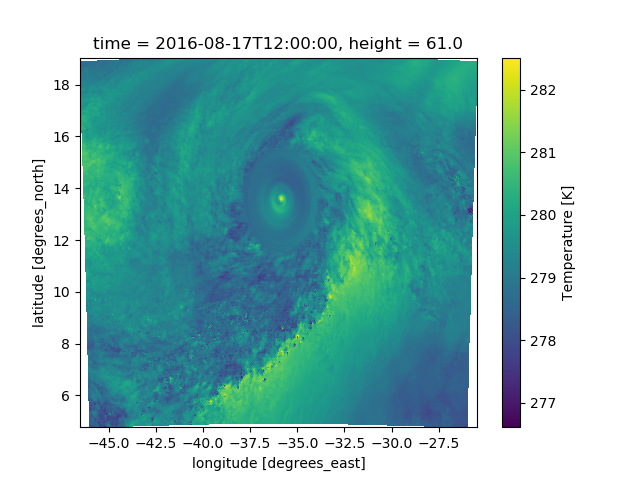

In [30]:
%matplotlib notebook
temp_ts0.isel(height=60).plot()

In [20]:
u_ts0 = ds_out.u[0]
u_ts0 = u_ts0.where(u_ts0 != -9.99e-08, drop = True)

<IPython.core.display.Javascript object>


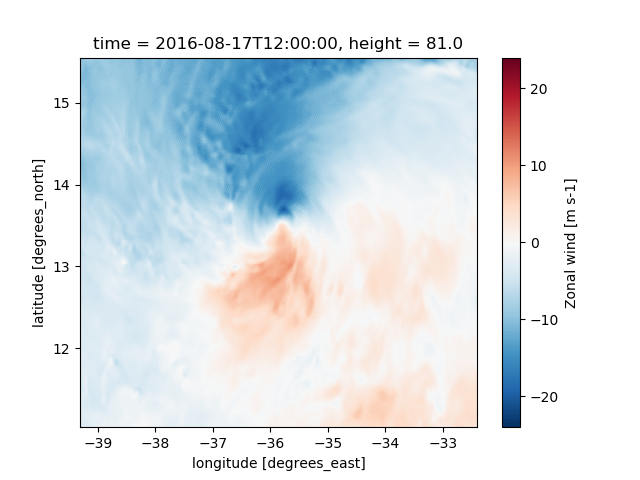

In [38]:
%matplotlib notebook
u_ts0.isel(height=80).plot()

In [25]:
v_ts0 = ds_out.v[0]
v_ts0 = v_ts0.where(v_ts0 != -9.99e-08, drop = True)

<IPython.core.display.Javascript object>


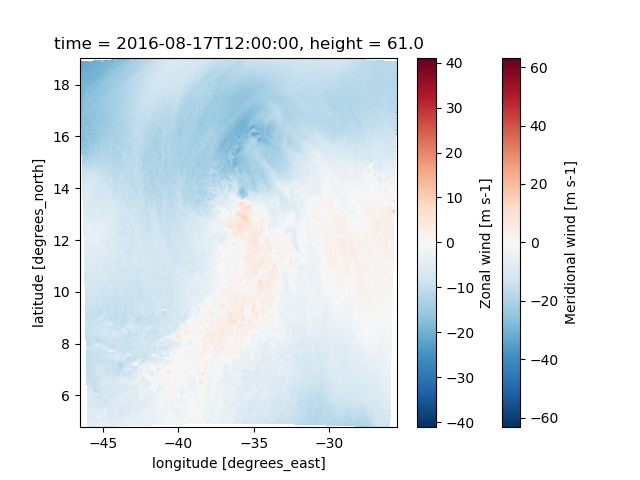

In [32]:
%matplotlib notebook

v_ts0.isel(height=60).plot()
